In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [4]:
data = pd.read_csv('santander-train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((76020, 370), (76020,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Removing constant, quasi-constant and duplicate features

In [9]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [10]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [11]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [12]:
X_train_T.duplicated().sum()

17

In [13]:
duplicated_features = X_train_T.duplicated()

In [16]:
features_to_keep = [not index for index in duplicated_features]

In [18]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [19]:
X_train_unique.shape, X_test_unique.shape

((60816, 257), (15204, 257))

### Calculating Mutual information gain

In [ ]:
#calculates the information gain of all the features in the dataset
mi = mutual_info_classif(X_train_unique,y_train)

In [ ]:
len(mi)

In [ ]:
mi

In [ ]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [ ]:
mi.sort_value(ascending = False, inplace = True)

In [ ]:
mi.plot.bar(figsize = (10,5))

In [ ]:
# selecting the best information gain i.e the top 10
selected = SelectPercentile(mutual_info_classif, percentile = 0.1).fit(X_train_unique,y_train)
X_train_unique.columns(sel.get_support())

In [ ]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [ ]:
X_train_mi.shape

### Mutual information Gain with Regression

In [28]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
boston = load_boston()

In [30]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [32]:
X = pd.DataFrame(data = boston.data, columns = boston.feature_names)
y = boston.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [35]:
mi = mutual_info_regression(X_train,y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending = False, inplace = True)

In [37]:
mi

LSTAT      0.678385
RM         0.565087
INDUS      0.508130
PTRATIO    0.491411
NOX        0.457640
TAX        0.377105
CRIM       0.363198
AGE        0.343189
DIS        0.325599
RAD        0.214093
ZN         0.194655
B          0.142076
CHAS       0.014676
dtype: float64

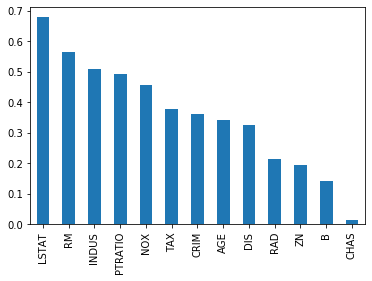

In [40]:
mi.plot.bar()

In [41]:
# selecting the top features using selectors

In [43]:
sel = SelectKBest(mutual_info_regression,k = 9).fit(X_train,y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [47]:
r2_score(y_test,y_predict)

0.5892223849182514

In [48]:
np.sqrt(mean_squared_error(y_test,y_predict))

5.783509315085132

In [50]:
np.std(y)

9.188011545278203

In [53]:
# checiking model using the selected version

X_train_9 = sel.transform(X_train)
X_train_9.shape

(404, 9)